# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

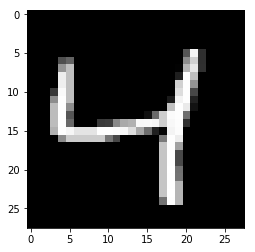

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)




In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)

# Regularized neural network by dropout
#regularizer = tf.nn.dropout(logits, keep_prob=0.8)

# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')
#decoded = tf.nn.sigmoid(regularizer, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6949
Epoch: 1/20... Training loss: 0.6913
Epoch: 1/20... Training loss: 0.6879
Epoch: 1/20... Training loss: 0.6843
Epoch: 1/20... Training loss: 0.6795
Epoch: 1/20... Training loss: 0.6744
Epoch: 1/20... Training loss: 0.6678
Epoch: 1/20... Training loss: 0.6595
Epoch: 1/20... Training loss: 0.6493
Epoch: 1/20... Training loss: 0.6382
Epoch: 1/20... Training loss: 0.6280
Epoch: 1/20... Training loss: 0.6154
Epoch: 1/20... Training loss: 0.5989
Epoch: 1/20... Training loss: 0.5844
Epoch: 1/20... Training loss: 0.5664
Epoch: 1/20... Training loss: 0.5474
Epoch: 1/20... Training loss: 0.5314
Epoch: 1/20... Training loss: 0.5120
Epoch: 1/20... Training loss: 0.4956
Epoch: 1/20... Training loss: 0.4783
Epoch: 1/20... Training loss: 0.4603
Epoch: 1/20... Training loss: 0.4469
Epoch: 1/20... Training loss: 0.4260
Epoch: 1/20... Training loss: 0.4131
Epoch: 1/20... Training loss: 0.3946
Epoch: 1/20... Training loss: 0.3813
Epoch: 1/20... Training loss: 0.3767
E

Epoch: 1/20... Training loss: 0.1939
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1960
Epoch: 1/20... Training loss: 0.1947
Epoch: 1/20... Training loss: 0.1916
Epoch: 1/20... Training loss: 0.1904
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1914
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1935
Epoch: 1/20... Training loss: 0.1906
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1972
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1895
Epoch: 1/20... Training loss: 0.1844
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1907
Epoch: 1/20... Training loss: 0.1965
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1857
Epoch: 1/20... Training loss: 0.1856
Epoch: 1/20... Training loss: 0.1921
Epoch: 1/20... Training loss: 0.1854
Epoch: 1/20... Training loss: 0.1824
E

Epoch: 2/20... Training loss: 0.1503
Epoch: 2/20... Training loss: 0.1585
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1611
Epoch: 2/20... Training loss: 0.1514
Epoch: 2/20... Training loss: 0.1563
Epoch: 2/20... Training loss: 0.1619
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1601
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1578
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1583
Epoch: 2/20... Training loss: 0.1558
Epoch: 2/20... Training loss: 0.1553
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1536
Epoch: 2/20... Training loss: 0.1527
Epoch: 2/20... Training loss: 0.1548
Epoch: 2/20... Training loss: 0.1524
E

Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1374
Epoch: 3/20... Training loss: 0.1360
Epoch: 3/20... Training loss: 0.1325
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1371
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1408
Epoch: 3/20... Training loss: 0.1382
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1282
Epoch: 3/20... Training loss: 0.1354
Epoch: 3/20... Training loss: 0.1295
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1348
Epoch: 3/20... Training loss: 0.1346
Epoch: 3/20... Training loss: 0.1339
Epoch: 3/20... Training loss: 0.1328
Epoch: 3/20... Training loss: 0.1368
Epoch: 3/20... Training loss: 0.1295
E

Epoch: 4/20... Training loss: 0.1268
Epoch: 4/20... Training loss: 0.1267
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1281
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1258
Epoch: 4/20... Training loss: 0.1235
Epoch: 4/20... Training loss: 0.1246
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1228
Epoch: 4/20... Training loss: 0.1242
Epoch: 4/20... Training loss: 0.1226
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1265
Epoch: 4/20... Training loss: 0.1200
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1284
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1245
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1229
E

Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1146
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1161
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1189
Epoch: 4/20... Training loss: 0.1095
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1115
Epoch: 4/20... Training loss: 0.1148
Epoch: 4/20... Training loss: 0.1154
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1120
Epoch: 5/20... Training loss: 0.1161
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1117
Epoch: 5/20... Training loss: 0.1144
Epoch: 5/20... Training loss: 0.1155
Epoch: 5/20... Training loss: 0.1167
Epoch: 5/20... Training loss: 0.1126
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1162
E

Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1121
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1040
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1067
Epoch: 5/20... Training loss: 0.1096
Epoch: 5/20... Training loss: 0.1076
Epoch: 5/20... Training loss: 0.1042
Epoch: 5/20... Training loss: 0.1079
Epoch: 5/20... Training loss: 0.1080
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1106
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1075
Epoch: 5/20... Training loss: 0.1044
Epoch: 5/20... Training loss: 0.1089
Epoch: 5/20... Training loss: 0.1082
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1041
E

Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1074
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1079
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.0983
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.0999
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1061
Epoch: 6/20... Training loss: 0.1035
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1064
Epoch: 6/20... Training loss: 0.1011
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1066
Epoch: 6/20... Training loss: 0.1043
Epoch: 6/20... Training loss: 0.1056
E

Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.1008
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1053
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0987
Epoch: 7/20... Training loss: 0.1024
Epoch: 7/20... Training loss: 0.0976
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1022
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1014
E

Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0958
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0985
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.1005
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0995
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0982
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0959
Epoch: 8/20... Training loss: 0.0972
E

Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0955
Epoch: 8/20... Training loss: 0.0953
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0996
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0943
Epoch: 8/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0982
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0936
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0989
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.1012
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.1011
E

Epoch: 9/20... Training loss: 0.0974
Epoch: 9/20... Training loss: 0.0924
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0933
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0987
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0940
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0991
Epoch: 9/20... Training loss: 0.0938
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0997
Epoch: 9/20... Training loss: 0.0957
Epoch: 9/20... Training loss: 0.0961
Epoch: 9/20... Training loss: 0.0928
Epoch: 9/20... Training loss: 0.0943
Epoch: 9/20... Training loss: 0.0990
Epoch: 9/20... Training loss: 0.0947
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0948
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.1011
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0946
Epoch: 9/20... Training loss: 0.0925
Epoch: 9/20... Training loss: 0.0985
E

Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0940
Epoch: 10/20... Training loss: 0.0942
Epoch: 10/20... Training loss: 0.0980
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0917
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0923
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0970
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0960
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0910
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0967
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0921
Epoch: 11/20... Training loss: 0.0908
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0961
Epoch: 11/20... Training loss: 0.0918
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0954
Epoch: 11/20... Training loss: 0.0914
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20... Training loss: 0.0946
Epoch: 11/20... Training loss: 0.0935
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0928
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0953
Epoch: 12/20... Training loss: 0.0954
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0905
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0938
Epoch: 12/20... Training loss: 0.0969
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0911
Epoch: 12/20... Training loss: 0.0957
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0937
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0915
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0926
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0926
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0933
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0952
Epoch: 13/20... Training loss: 0.0936
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0976
Epoch: 13/20... Training loss: 0.0912
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0913
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0878
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0925
Epoch: 13/20... Training loss: 0.0938
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0903
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0916
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0959
Epoch: 13/20... Training loss: 0.0937
Epoch: 13/20... Training loss: 0.0919
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.0965
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0893
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0947
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0928
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0936
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0919
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20... Training loss: 0.0959
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0951
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0969
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20... Training loss: 0.0920
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0921
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0973
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0941
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0933
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0976
Epoch: 15/20... Training loss: 0.0943
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0919
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0936
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0898
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0937
Epoch: 16/20... Training loss: 0.0891
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0922
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0900
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0906
Epoch: 16/20... Training loss: 0.0904
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0929
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0961
Epoch: 16/20... Training loss: 0.0917
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0912
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0912
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0924
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0975
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0978
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0916
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0905
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0928
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0922
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0950
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0952
Epoch: 17/20... Training loss: 0.0948
Epoch: 17/20... Training loss: 0.0978
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0943
Epoch: 17/20... Training loss: 0.0949
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0906
Epoch: 17/20... Training loss: 0.0930
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0957
Epoch: 18/20... Training loss: 0.0965
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0923
Epoch: 18/20... Training loss: 0.0940
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0900
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0968
Epoch: 18/20... Training loss: 0.0966
Epoch: 18/20... Training loss: 0.0974
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0914
Epoch: 18/20... Training loss: 0.0935
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0973
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0867
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0930
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0947
Epoch: 19/20... Training loss: 0.0910
Epoch: 19/20... Training loss: 0.0966
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0901
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0941
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0924
Epoch: 19/20... Training loss: 0.0909
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0960
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0989
Epoch: 19/20... Training loss: 0.0946
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0971
Epoch: 19/20... Training loss: 0.0932
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0954
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0949
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0959
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0950
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0964
Epoch: 20/20... Training loss: 0.0864
Epoch: 20/20... Training loss: 0.0911
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0973
Epoch: 20/20... Training loss: 0.0903
Epoch: 20/20

Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0946
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0965
Epoch: 20/20... Training loss: 0.0922
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0941
Epoch: 20/20... Training loss: 0.0898
Epoch: 20/20... Training loss: 0.0899
Epoch: 20/20... Training loss: 0.0940
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0888
Epoch: 20/20... Training loss: 0.0919
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0963
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

In [ ]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [ ]:
sess.close()